In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Import

In [3]:
path = 'dataset/'

low = pd.read_csv(path+'low_v_tan_position.csv')
high = pd.read_csv(path+'high_v_tan_position.csv')

In [8]:
low.head(2)

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,0,3293764686491591168,9.915977,42.387168,186.179032,-24.301958,1.112200
1,2,3293772490447823232,12.095703,31.409473,186.028342,-24.547609,1.320612


In [10]:
high.head(2)

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,36,3293818223259506304,9.378773,105.648118,185.929313,-23.796143,1.109787
1,37,3293819215396280192,9.687300,119.167758,185.887620,-23.815332,1.150410


## Distribution

Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Distribution')

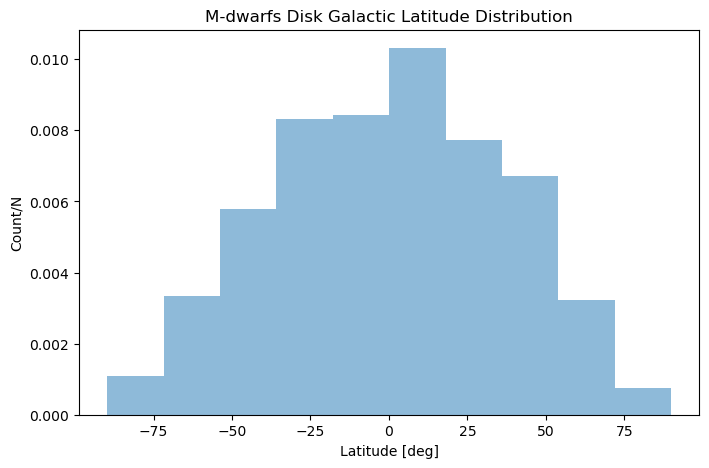

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(low['b'], alpha=0.5, density=True)


plt.xlabel('Latitude [deg]')
plt.ylabel('Count/N')
plt.title('M-dwarfs Disk Galactic Latitude Distribution')

## Prior

In [18]:
from scipy.stats import norm

def plot_dist(mean, scale, num = 1000, yscale = 1, **kwargs):
    x =np.linspace(norm.ppf(0.001,loc=mean,scale=scale),
                    norm.ppf(0.999,loc=mean,scale=scale), num)

    y = norm.pdf(x,loc=mean,scale=scale)/yscale

    plt.plot(x, y, **kwargs)

Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Distribution Prior')

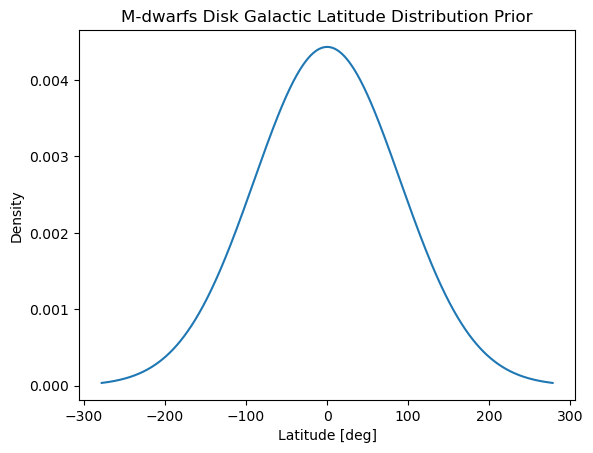

In [29]:
a= 0
b=90**2

plot_dist(a, np.sqrt(b))

plt.xlabel('Latitude [deg]')
plt.ylabel('Density')
plt.title('M-dwarfs Disk Galactic Latitude Distribution Prior')

In [21]:
nobs = len(low['b'])
samp_mean = np.mean(low['b'])
v = samp_var = np.var(low['b'])


print('Number of observations:',nobs)
print('Sample mean:',samp_mean)
print('Sample variance:',samp_var)

Number of observations: 182409
Sample mean: 0.07394853063060021
Sample variance: 1336.549888767328


In [23]:
post_var = (v*b / (nobs*b + v))

post_mean = (nobs * samp_mean / v) + a/b
post_mean = post_mean * post_var

print('Posterior Mean:',post_mean)
print('Posterior Variance:',post_var)

Posterior Mean: 0.07394846373723435
Posterior Variance: 0.007327207976212154


In [24]:
ci_low_val = norm.ppf(0.025,loc=post_mean,scale=np.sqrt(post_var))
ci_up_val = norm.ppf(0.975,loc=post_mean,scale=np.sqrt(post_var))
print('95 % interval: ', ci_up_val-ci_low_val)

95 % interval:  0.3355423532806584


Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Posterior')

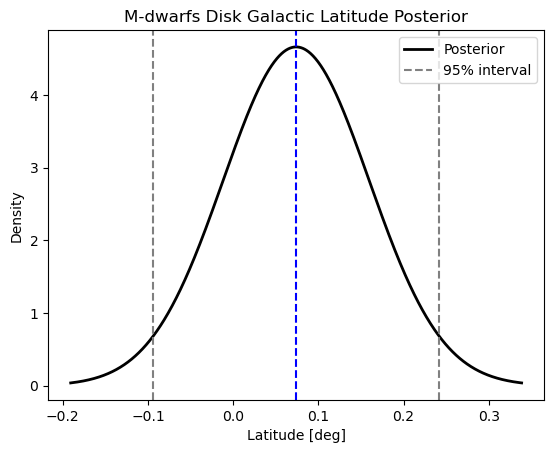

In [28]:
#plt.hist(low['b'], bins=10)

#plt.hist(low['b'], alpha=0.5, density=True)
plot_dist(post_mean, np.sqrt(post_var), 1000, 1, color='k', lw=2, label='Posterior')
plt.axvline(post_mean, color = "b", ls = "--")

plt.axvline(ci_low_val, color = "gray", ls = "--", label = '95% interval')
plt.axvline(ci_up_val, color = "gray", ls = "--")


plt.legend()
plt.xlabel('Latitude [deg]')
plt.ylabel('Density')
plt.title('M-dwarfs Disk Galactic Latitude Posterior')